In [146]:
import numpy as np
import re
import pandas as pd

all_df = pd.read_csv('london_All7year.csv', delimiter=',')

#seprate_date
all_df[['day','hour']] = all_df['date'].str.split(' ', 1, expand=True)
all_df[['month','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df[['day_date','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df.head(3)
all_df[['year','hour']] = all_df['hour'].str.split(' ', 1, expand=True)
all_df[['start_hour','end_hour']] = all_df['hour'].str.split('—', 1, expand=True)
all_df['day'] = all_df['day'].replace(',', '',regex=True)
all_df['day_date'] = all_df['day_date'].replace(',', '',regex=True)
all_df['year'] = all_df['year'].replace(',', '',regex=True)

all_df = all_df.drop(columns=['hour'])
#all_df.to_csv('clean_Weather_london_1.csv', sep=',')
all_df = all_df[['date', 'date_id','wind','desc','temp','baro','hum','year','month','day','day_date','start_hour','end_hour']]
all_df[['wind', 'temp','baro']] = all_df[['wind', 'temp','baro']].astype(float)
all_df[['hum', 'year','day_date']] = all_df[['hum', 'year','day_date']].astype(int)

In [147]:
from datetime import datetime

#convert 12 hour to 24 hour 
all_df['start_hour'] = pd.to_datetime(all_df['start_hour']).dt.strftime('%H:%M')

#end hour is ' 6:00 am' so it has extra space
#remove space
all_df['end_hour']=all_df['end_hour'].str.replace(' ', '')
all_df['end_hour'] = pd.to_datetime(all_df['end_hour']).dt.strftime('%H:%M')

# convert month name to number
all_df['month'] = pd.to_datetime(all_df.month, format='%B').dt.month
all_df.head(3)

,date,date_id,wind,desc,temp,baro,hum,year,month,day,day_date,start_hour,end_hour
0,"Friday, January 1, 2021, 12:00 am — 6:00 am",1.609459e+12,4.971,Low clouds.,32.0,29.82,99,2021,1,Friday,1,00:00,06:00
1,"Friday, January 1, 2021, 6:00 am — 12:00 pm",1.609481e+12,4.971,Low clouds.,33.8,29.86,94,2021,1,Friday,1,06:00,12:00
2,"Friday, January 1, 2021, 12:00 pm — 6:00 pm",1.609502e+12,4.350,Drizzle. Low clouds.,37.4,29.87,96,2021,1,Friday,1,12:00,18:00


In [149]:
all_df.head(15)
all_df.to_csv("cleanAll7Year.csv", index=False) 

In [150]:
days = {'Monday':0, 'Tuesday':1,'Wednesday': 2, 'Thursday':3, 'Friday':4,'Saturday': 5, 'Sunday':6}
all_df['day'] = all_df['day'].map(days)
all_df.head(2)

,date,date_id,wind,desc,temp,baro,hum,year,month,day,day_date,start_hour,end_hour
0,"Friday, January 1, 2021, 12:00 am — 6:00 am",1.609459e+12,4.971,Low clouds.,32.0,29.82,99,2021,1,4,1,00:00,06:00
1,"Friday, January 1, 2021, 6:00 am — 12:00 pm",1.609481e+12,4.971,Low clouds.,33.8,29.86,94,2021,1,4,1,06:00,12:00


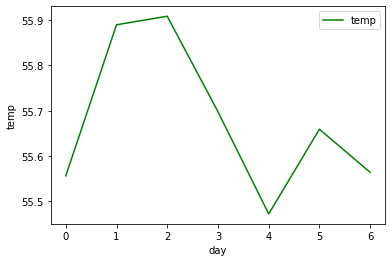

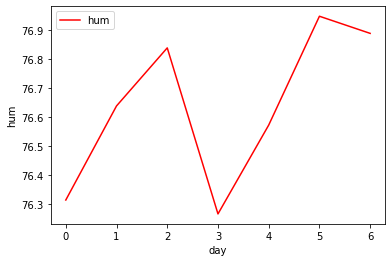

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# in all 7 years_ mean temp of each weekday 
df= all_df.groupby(['day'])['temp'].mean().reset_index()
df2= all_df.groupby(['day'])['hum'].mean().reset_index()

ax=df.plot(x ='day', y='temp', kind = 'line' , color=['green'])
ax2=df2.plot(x ='day', y='hum', kind = 'line' , color=['red'])
ax.set_ylabel("temp")
ax.set_xlabel("day")

ax2.set_ylabel("hum")
ax2.set_xlabel("day")
#plt.yticks(np.arange(53, 80, 1))
#plt.savefig('meanTemp_weekday.pdf')
plt.show()

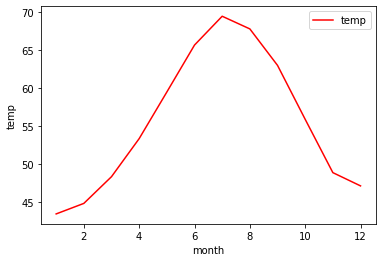

In [124]:
# mean_temp in all month of 7 years
df_m= all_df.groupby(['month'])['temp'].mean().reset_index()

ax=df_m.plot(x ='month', y='temp', kind = 'line' , color=['red'])
ax.set_ylabel("temp")
ax.set_xlabel("month")
plt.show()

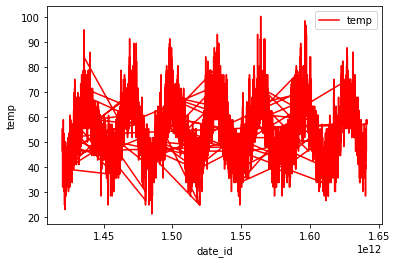

In [141]:
ax=all_df.plot(x ='date_id', y='temp', kind = 'line' , color=['red'])
ax.set_ylabel("temp")
ax.set_xlabel("date_id")
plt.show()